<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Histogram specification

In [1]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Checkbox

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku

In [4]:
def show(img, show_hist=True, show_by_channel=False, density=False):
    dims = img.shape
    if len(dims) < 2:
        print('Not an image')
        return
    if len(dims) == 2:
        # gray scale image, require aditional last channel
        #print('Expandig last dim')
        img = np.expand_dims(img, -1)
    
    # map to uint8
    img = np.array(img, dtype = np.uint8) 

    channels = img.shape[-1] # last dim is the channel
    if channels == 3:
        labels = ['Red', 'Green', 'Blue']
        colors = ['r', 'g', 'b']
    else:
        labels = ['Gray']
        colors = ['gray']
    if show_hist:
        if show_by_channel and channels == 3:
            fig, axs = plt.subplots(2, channels + 1,
                                       figsize=(12, 6))
            
            # Display original image.
            axs[0, 0].imshow(img)
            axs[0, 0].set_axis_off()
            axs[1, 0].set_axis_off()
            for i in range(channels):
                axs[0, i+1].imshow(img[..., i])
                axs[0, i+1].set_axis_off()

            # Display the histogram.
            for i, (label, color) in enumerate(zip(labels, colors)):
                axs[1, i+1].hist(img[..., i].ravel(), lw=0, bins=256, color=color, density=density)
                axs[1, i+1].set_xlim(0, img[..., i].max())
                axs[1, i+1].set(xlabel=label)
                axs[1, i+1].set_yticks([])
        
            plt.show()
        else:
            # Display the image.
            fig, axs = plt.subplots(1, channels + 1,
                                        figsize=(12, 3))
        
            if channels == 3:
                axs[0].imshow(img)
            if channels == 1:
                axs[0].imshow(img[..., 0], cmap='gray')
            axs[0].set_axis_off()
        
            # Display the histogram.
            for i, (label, color) in enumerate(zip(labels, colors)):
                axs[i+1].hist(img[..., i].ravel(), lw=0, bins=256, color=color, density=density)
              
        
            plt.show()
    else:
        # Display the image.
        fig = plt.figure(figsize=(3, 3))
        if channels == 3:
            plt.imshow(img)
        if channels == 1:
            plt.imshow(img[..., 0], cmap='gray')
        plt.axis('off')

**Histogram Specification**

Histogram specification (or modeling) refers to a
class of image transforms which aims to obtain images
the histograms of which have a desired shape 

Histogram specification generalizes the histogram equalization case.


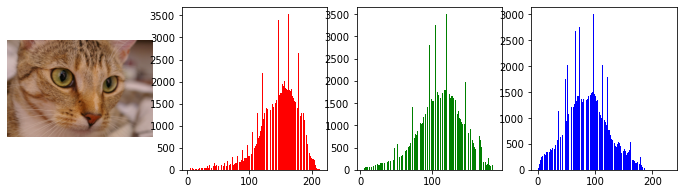

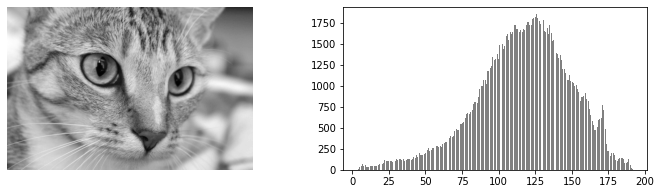

In [5]:
# working in range [0.0, 255.0]
img = skimage.img_as_float(skid.chelsea())*255.0
#img = skimage.img_as_float(skid.astronaut())*255.0
# read from file
#img = skimage.io.imread('desk.jpeg')*1.
show(img)

# convert to gray-scale image
gray_img = skic.rgb2gray(img)
show(gray_img)

In [6]:
# get the histogram
h = lambda x : np.histogram(x, bins=256)

# finding the PDF of the histogram 
pdf = lambda h: h/ sum(h)
  
# using numpy np.cumsum to calculate the CDF
cdf = lambda pdf: np.cumsum(pdf)

In [7]:
# define desired cdf
# step function Ux
Ux = lambda x: np.array(x>=0, dtype=int)
# desired cdf
f = lambda x: 0.5*((x/0.5)**2)*(Ux(x) - Ux(x-0.5)) + 0.5*(2-(-x/0.5 + 2)**2)*Ux(x-0.5)
# inverse of f
g = lambda x: 0.5*np.sqrt(x/0.5)*(Ux(x)-Ux(x-0.5)) + 0.5*(2-np.sqrt(2-(x/0.5)))*Ux(x-0.5)

In [8]:
img_h, _ = h(gray_img)
img_pdf = pdf(img_h)
img_cdf = cdf(img_pdf)

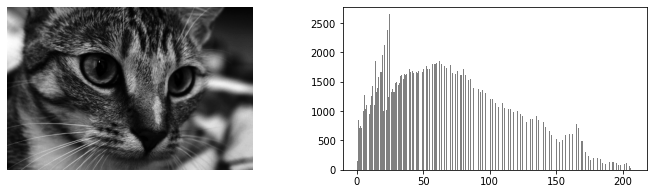

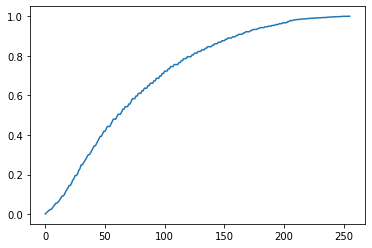

In [9]:
# image equalization
Pa = lambda cdf, x: cdf[np.uint8(x.ravel())]

Ieq = np.reshape(np.round(255*Pa(img_cdf, gray_img)), gray_img.shape)
show(Ieq)
Ieq_h, _ = h(Ieq)
Ieq_pdf = pdf(Ieq_h)
Ieq_cdf = cdf(Ieq_pdf)
plt.plot(Ieq_cdf)
plt.show()

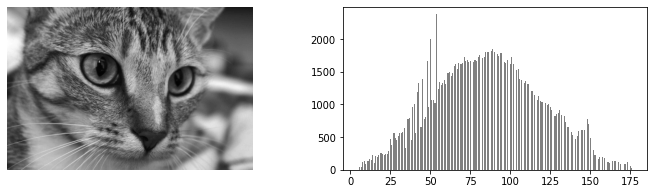

In [10]:
# image histogram specification
Ihs = np.reshape(np.round(255*g(Pa(img_cdf, gray_img))), gray_img.shape)
show(Ihs)

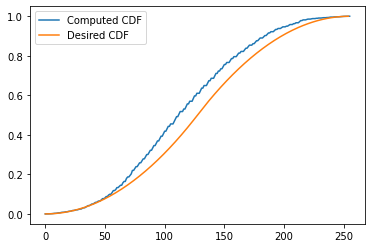

In [11]:
# compare CDF's
x = np.arange(0, 1, 1/255)
fx = f(x)
Ihs_h, _ = h(Ihs)
Ihs_pdf = pdf(Ihs_h)
Ihs_cdf = cdf(Ihs_pdf)
plt.plot(Ihs_cdf, label='Computed CDF')
plt.plot(fx, label='Desired CDF')
plt.legend()
plt.show()